Importing the necessary packages for exploration

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Check to confirm working directory

In [2]:
os.getcwd()

'/Users/macbook/Documents/workspace_ml/twitter_sentiment_love_island'

Load the merged dataset for exploration

In [3]:
all_merged_data = pd.read_csv('outputs/all_merged_data.csv')
print("'all_merged_data' successfully loaded...")

'all_merged_data' successfully loaded...


Inspect the merged dataframe

In [4]:
all_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      3000 non-null   int64  
 1   author.properties.friends       3000 non-null   object 
 2   author.properties.status_count  2999 non-null   float64
 3   author.properties.verified      3000 non-null   object 
 4   content.body                    2999 non-null   object 
 5   location.country                2999 non-null   object 
 6   properties.platform             2998 non-null   object 
 7   properties.sentiment            2999 non-null   float64
 8   location.latitude               2999 non-null   float64
 9   location.longitude              2999 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 234.5+ KB


To check and identify null values

In [5]:
# Function to check for missing data
def check_null(x):
    # Counts missing data values
    missing_data_count=x.isnull().sum().sort_values(ascending = False)
    percentage = (x.isnull().sum()/x.isnull().count()*100).sort_values(ascending = False)
    # Missing data statistics, if any
    missing_data = pd.concat([missing_data_count,percentage],axis=1,keys=['Missing Data','Percentage'])
    # Note the axis values for row and column respectively
    # Checks how many rows with missing data
    missing_data_rows=pd.isnull(x).any(axis=1).sum()
    # Checks how many columns with missing data
    missing_data_columns=pd.isnull(x).any(axis=0).sum()
    # Print summary information
    print ("The checked data has" + " " + str(x.shape[1]) + " " + " " + "columns.\n" \
           "There are" + " " + str(missing_data_columns) + " " + \
           "columns with missing data and...\n" + \
           "...a total of" + " " + str(missing_data_rows)+ " " + \
           "rows with missing data.")
    x_null = x[x.isnull().any(axis=1)]
    print (missing_data)
    # Return missing data
    return x_null

In [6]:
check_null(all_merged_data)

The checked data has 10  columns.
There are 7 columns with missing data and...
...a total of 2 rows with missing data.
                                Missing Data  Percentage
properties.platform                        2        0.07
author.properties.status_count             1        0.03
content.body                               1        0.03
location.country                           1        0.03
properties.sentiment                       1        0.03
location.latitude                          1        0.03
location.longitude                         1        0.03
Unnamed: 0                                 0        0.00
author.properties.friends                  0        0.00
author.properties.verified                 0        0.00


,Unnamed: 0,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
1551,551,854,3688.00,False,@DrunkenOldQrow @FancyWeiss,GB,NaN,1.00,52.05,-2.70
1552,552,|| TELL ME YOUR NAME! XD,NaN,twitter,NaN,NaN,NaN,NaN,NaN,NaN


Rows 1551 and 1552 have null values

Drop row 1552 due to multiple NaN values

In [7]:
new_merged_data = all_merged_data.drop([1552])

In [8]:
new_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2999 non-null   int64  
 1   author.properties.friends       2999 non-null   object 
 2   author.properties.status_count  2999 non-null   float64
 3   author.properties.verified      2999 non-null   object 
 4   content.body                    2999 non-null   object 
 5   location.country                2999 non-null   object 
 6   properties.platform             2998 non-null   object 
 7   properties.sentiment            2999 non-null   float64
 8   location.latitude               2999 non-null   float64
 9   location.longitude              2999 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 257.7+ KB


Use fillna to propagate non-NA values forward for row 1551.

In [9]:
love_island_data =new_merged_data.fillna(method="pad")

In [10]:
love_island_data.shape

(2999, 10)

To format the data type

In [16]:
love_island_data['author.properties.friends'] = love_island_data['author.properties.friends'].astype(int)

Write adjusted dataframe to csv file

In [17]:
save_path = 'outputs/love_island_data.csv'

In [18]:
love_island_data.to_csv('outputs/love_island_data.csv')

## Table 1 - Country Statistics

In [19]:
love_island_country = love_island_data['location.country'].value_counts()
love_island_country

GB    2991
GG       5
JE       2
IM       1
Name: location.country, dtype: int64

Country Code | Status Count| Countries |
| --- | --- | --- |
| GB | 2991 | Great Britain |
| GG | 5    | Guernsey |
| JE | 2    | Jersey |
| IM | 1    | Isle of Man |

## Plot 1 - Sentiment Counts

In [20]:
love_island_sentiment = love_island_data['properties.sentiment'].value_counts()
love_island_sentiment

-1.00    1403
0.00      968
1.00      628
Name: properties.sentiment, dtype: int64

The sentiments are positive 1, neutral 0 and negative -1


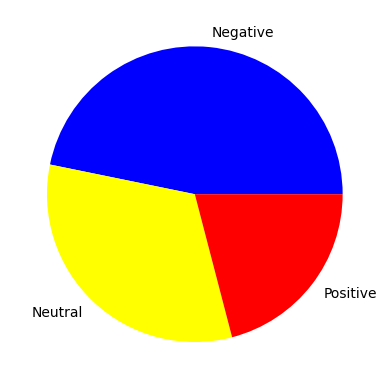

In [21]:
import matplotlib.pyplot as plt
sent_count = np.array([1403, 968, 628])
sentiment = ["Negative", "Neutral", "Positive"]
sent_colors = ["blue", "yellow", "red"]

plt.pie(sent_count, labels = sentiment, colors = sent_colors)
print(f"The sentiments are positive 1, neutral 0 and negative -1")
save_path = 'images/SentimentCount.svg'
plt.show()

## Plot 2 - Distribution of Friends and Status Count Relationship

Duplicate dataframe to keep dataset intact

In [27]:
love_island_data_copy = love_island_data.copy()
love_island_data_copy['LogStatusCount'] = np.log(love_island_data_copy['author.properties.status_count'])
love_island_data_copy['LogFriends'] = np.log(love_island_data_copy['author.properties.friends'])

/Users/macbook/opt/anaconda3/envs/twittersentiment_env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
love_island_data_copy['LogStatusCount'].min(), love_island_data_copy['LogStatusCount'].max()

(0.6931471805599453, 14.347587171407788)

In [29]:
love_island_data_copy['LogFriends'].min(), love_island_data_copy['LogFriends'].max()

(-inf, 12.715981849511797)

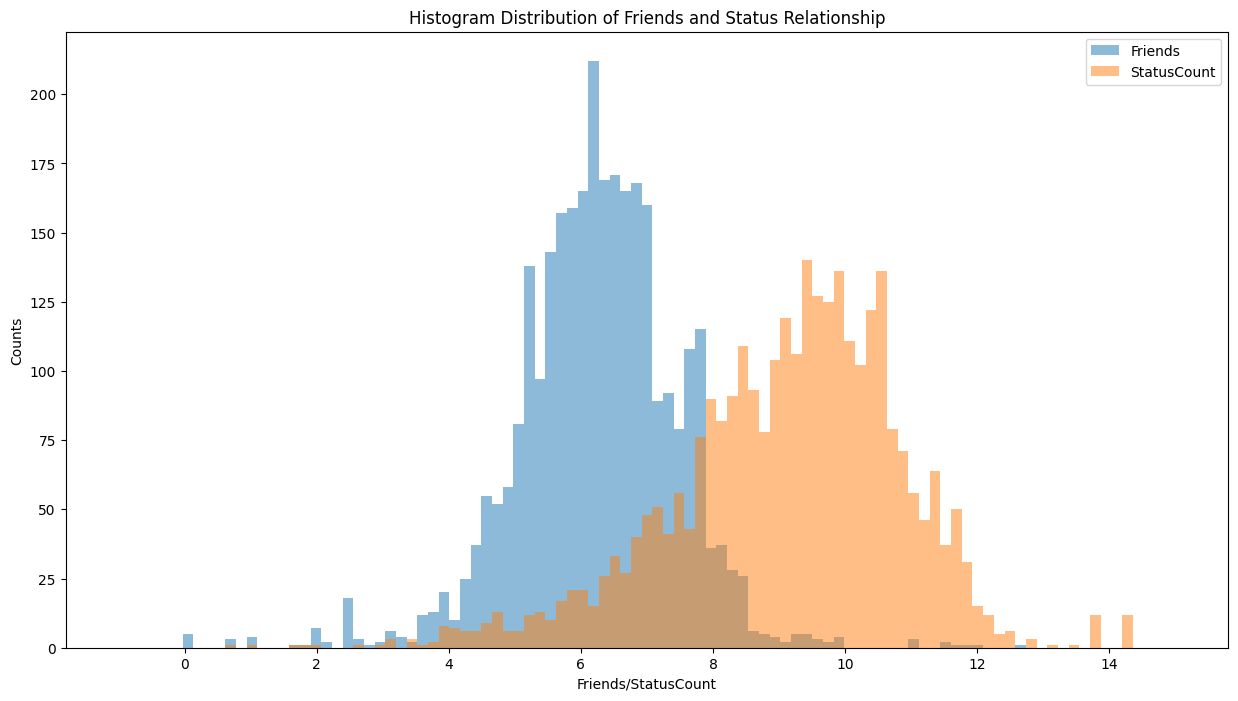

In [30]:
bins=np.linspace(-1,15,100)
love_island_data_copy['LogFriends'].hist(bins=bins, figsize=(15,8),alpha=0.5,label="Friends")
love_island_data_copy['LogStatusCount'].hist(bins=bins, figsize=(15,8),alpha=0.5,label="StatusCount")
plt.legend()
plt.xlabel("Friends/StatusCount")
plt.ylabel("Counts")
plt.title("Histogram Distribution of Friends and Status Relationship")
plt.grid(None)
save_path = 'images/Friends-StatusCount.svg'
plt.show()

To calculate correlation between number of friends and status count

In [31]:
love_island_data['author.properties.friends'].corr(love_island_data['author.properties.status_count'])

0.05659204912125569

The correlation is about 5.66%, not significant

To calculate correlation between number of friends and sentiment

In [32]:
love_island_data['author.properties.friends'].corr(love_island_data['properties.sentiment'])

0.024300949979256345

The correlation is about 2.43%, not significant

To calculate correlation between status count and sentiment

In [34]:
love_island_data['author.properties.status_count'].corr(love_island_data['properties.sentiment'])

0.03636783031129109

The correlation is about 3.63%, not significant